<a href="https://colab.research.google.com/github/KAVINESH23/Text-Embedding/blob/main/Intent%20classification_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
!pip install tensorflow datasets
from datasets import load_dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import tensorflow as tf


In [13]:

import pandas as pd
# Define the file paths
splits = {'train': 'train.csv', 'validation': 'valid.csv', 'test': 'test.csv'}
dataset = pd.read_csv("hf://datasets/Bhuvaneshwari/intent_classification/" + splits["train"])

# Extract train and validation data
text = dataset['text']
intent = dataset['intent']


# Split the train data into training and validation sets
train_text, test_text, train_intent, test_intent = train_test_split(text, intent, test_size=0.2, random_state=42)

# Tokenize the text
max_words = 10000
max_len = 100

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(train_text)
X_train_sequences = tokenizer.texts_to_sequences(train_text)
X_val_sequences = tokenizer.texts_to_sequences(test_text)

# Pad sequences
X_train = pad_sequences(X_train_sequences, maxlen=max_len)
X_test = pad_sequences(X_val_sequences, maxlen=max_len)

# Encode labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(train_intent)
y_val_encoded = label_encoder.transform(test_intent)

# Convert labels to one-hot encoded format
y_train = tf.keras.utils.to_categorical(y_train_encoded)
y_test = tf.keras.utils.to_categorical(y_val_encoded)
print(y_train)
print(y_test)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [14]:
# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=max_words, output_dim=128, input_length=max_len),
    tf.keras.layers.LSTM(18),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(12, activation='softmax')  # Output layer with num_classes units
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


history = model.fit(X_train, y_train, epochs=5, batch_size=32,verbose=2)
# Print model summary
model.summary()
#validation
train_result = model.fit(X_train, y_train, epochs=5, validation_split=0.2)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
346/346 - 23s - 66ms/step - accuracy: 0.6810 - loss: 1.1521
Epoch 2/5
346/346 - 18s - 53ms/step - accuracy: 0.9361 - loss: 0.2864
Epoch 3/5
346/346 - 18s - 53ms/step - accuracy: 0.9651 - loss: 0.1762
Epoch 4/5
346/346 - 16s - 46ms/step - accuracy: 0.9784 - loss: 0.1197
Epoch 5/5
346/346 - 21s - 61ms/step - accuracy: 0.9847 - loss: 0.0888


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 100, 128)            │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 18)                  │          10,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 18)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 12)                  │             228 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,872,438 (14.77 MB)

 Trainable params: 1,290,812 (4.92 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,581,626 (9.85 MB)

Epoch 1/5
277/277 ━━━━━━━━━━━━━━━━━━━━ 15s 55ms/step - accuracy: 0.9872 - loss: 0.0714 - val_accuracy: 0.9977 - val_loss: 0.0125
Epoch 2/5
277/277 ━━━━━━━━━━━━━━━━━━━━ 21s 58ms/step - accuracy: 0.9916 - loss: 0.0558 - val_accuracy: 0.9986 - val_loss: 0.0087
Epoch 3/5
277/277 ━━━━━━━━━━━━━━━━━━━━ 15s 56ms/step - accuracy: 0.9863 - loss: 0.0599 - val_accuracy: 0.9986 - val_loss: 0.0083
Epoch 4/5
277/277 ━━━━━━━━━━━━━━━━━━━━ 20s 55ms/step - accuracy: 0.9922 - loss: 0.0442 - val_accuracy: 0.9986 - val_loss: 0.0071
Epoch 5/5
277/277 ━━━━━━━━━━━━━━━━━━━━ 21s 55ms/step - accuracy: 0.9883 - loss: 0.0421 - val_accuracy: 0.9986 - val_loss: 0.0069


In [15]:
result = model.evaluate(X_test, y_test)
print("Accuracy", result[1])
print("Loss", result[0])

87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9839 - loss: 0.0763
Accuracy 0.9800869226455688
Loss 0.09685861319303513


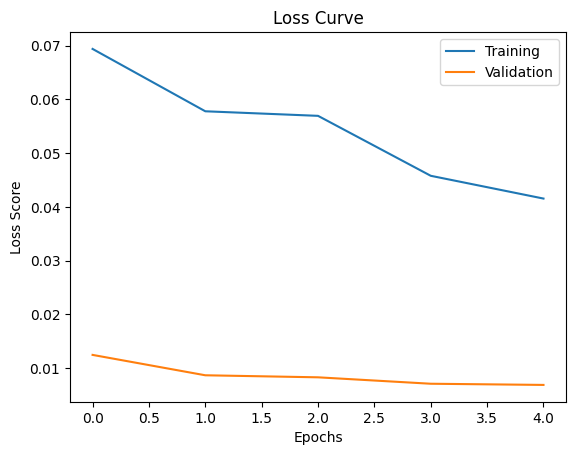

In [22]:
import matplotlib.pyplot as plt
plt.plot(train_result.history['loss'])
plt.plot(train_result.history['val_loss'])
plt.title("Loss Curve")
plt.xlabel("Epochs")
plt.ylabel("Loss Score")
plt.legend(['Training', 'Validation'])
plt.show()

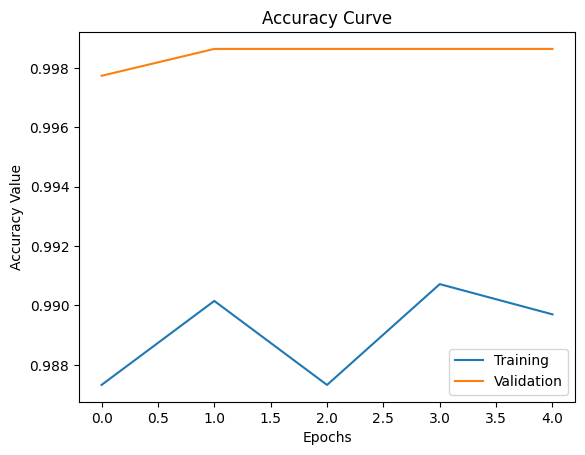

In [25]:
import matplotlib.pyplot as plt
plt.plot(train_result.history['accuracy'])
plt.plot(train_result.history['val_accuracy'])

plt.title("Accuracy Curve")
plt.xlabel("Epochs")
plt.ylabel("Accuracy Value")
plt.legend(['Training', 'Validation'])
plt.show()

87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step


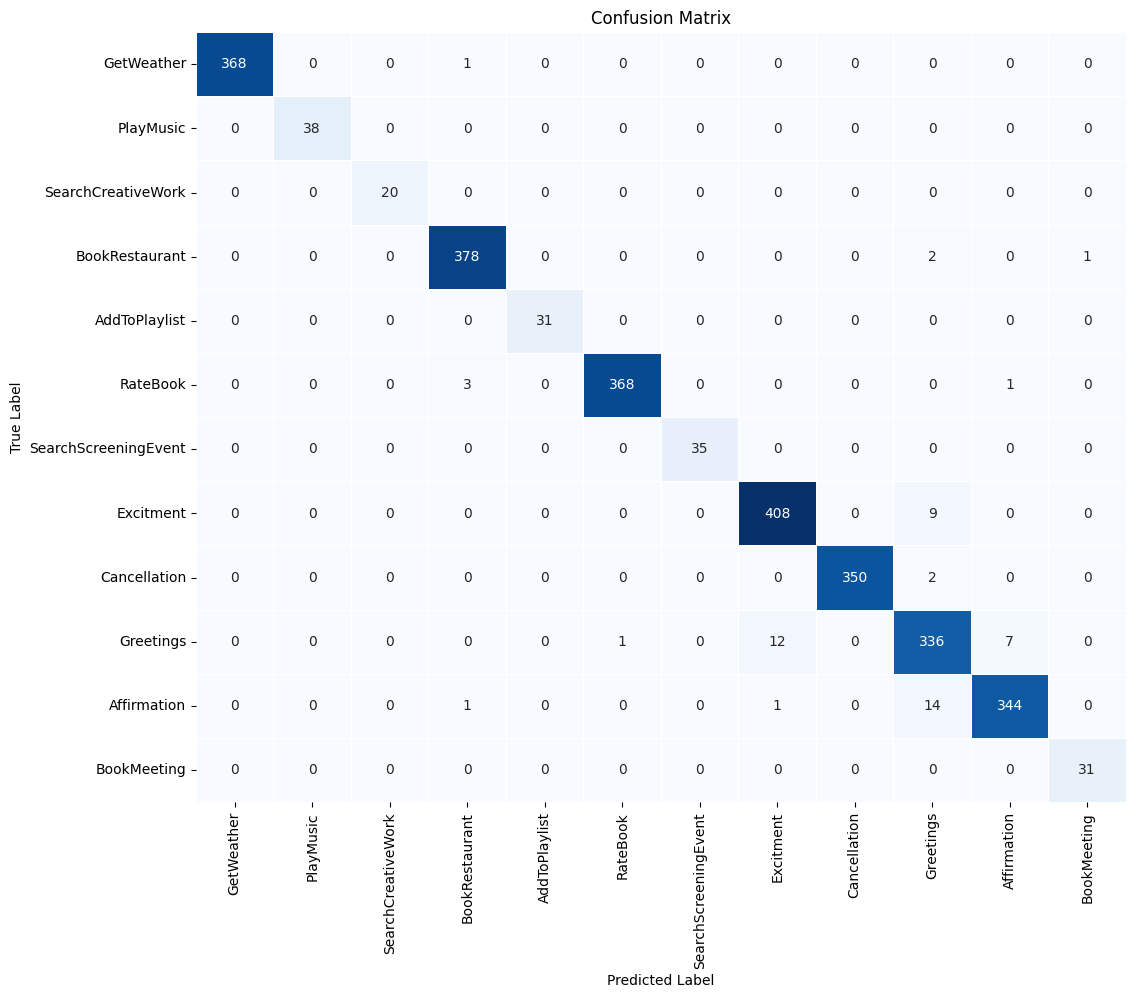

In [21]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Make predictions on the test set
pred = model.predict(X_test)
# Convert predictions to class indices
predicted = [np.argmax(p) for p in pred]

# Compute the confusion matrix
conf_mat = confusion_matrix(y_test, predicted)

# Replace these with your actual intent labels
intent_labels = [
    'GetWeather', 'PlayMusic', 'SearchCreativeWork', 'BookRestaurant',
    'AddToPlaylist', 'RateBook', 'SearchScreeningEvent', 'Excitment',
    'Cancellation', 'Greetings', 'Affirmation', 'BookMeeting'
]

# Create a DataFrame for better visualization
cm_df = pd.DataFrame(conf_mat, index=intent_labels, columns=intent_labels)

# Plot confusion matrix using Seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.5)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [27]:
import numpy as np
user_input = input("Ask a question: ")

# Preprocess the input
user_input_sequence = tokenizer.texts_to_sequences([user_input])
user_input_padded = pad_sequences(user_input_sequence, maxlen=max_len)

# Make prediction
prediction = model.predict(user_input_padded)

# Get the predicted intent
predicted_intent_index = np.argmax(prediction)
predicted_intent = label_encoder.inverse_transform([predicted_intent_index])[0]

# Print the predicted intent
print("Predicted intent:", predicted_intent)

Ask a question: good evening
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Predicted intent: Greetings


In [28]:
#saving the model
model.save('intent_classification.h5')